In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

The dataset contains the data of the constomer. On the basis of the data we have to predict the churn rate by the customer.
The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges' and  'Churn'

The amount of customers who stop doing business with a company during a predetermined time period is measured by a business indicator called churn rate. It is often referred to as the client turnover rate or customer attrition rate. The following formula can be used to determine the percentage that represents the churn rate:

Churn Rate = (Total Customers at the Beginning of the Period / Total Customers Lost During the Period) × 100


The churn rate, for instance, would be as follows if a business had 500 clients at the start of a month and lost 50 of them:

Churn Rate is equal to (50/500) x 100, or 10%.

This indicates that during that month, the company lost 10% of its consumer base.

A company may experience problems like subpar customer service, unfair pricing, or a subpar product if it has a high rate of client churn. On the other hand, a low churn rate shows that the business is doing a good job of keeping its clients.

Businesses must monitor their turnover rate over time and, if necessary, take action to lower it. Businesses can employ tactics like better customer service, loyalty programs, greater product quality, and more competitive pricing to lower turnover.


In general, churn rate is an effective statistic for companies to gauge and track the efficacy of their customer retention strategies, assisting them in making data-driven choices and enhancing customer happiness.

## Importing Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
# loading first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* This dataset contains the details of customers in  both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as " Binary Classification " where we need to predict the several churn using th classification models.

## Exploratory Data Analysis(EDA)

In [3]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Observation - The dataste have 21 columns and from the columns only 3 columns are numerical and other are categorical 
* the is no null value in the dataset 
* datatypes: float64(1), int64(2), object(18)

In [4]:
#Checking the columns 
df.columns.to_list()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [5]:
# checking the dimension of the dataset
df.shape

(7043, 21)

* The dataset contains 7043 rows and 21 columns. Out of which 1 is target variable and remaining 20 are independent variables.

In [6]:
# checking duplicates in the dataset
df.duplicated().sum()

0

* There no duplicate in the dataset.

<AxesSubplot:>

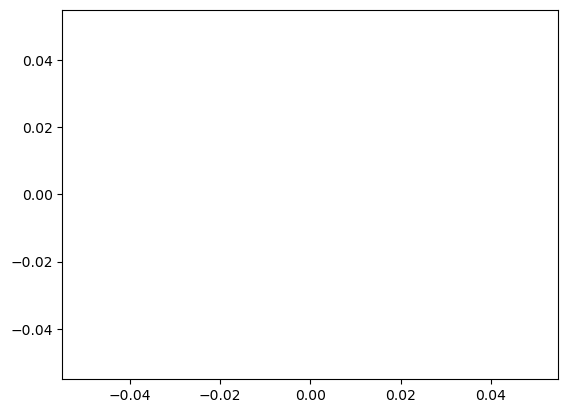

In [7]:
sns.scatterplot(df.isnull().sum())

* we can see in the visualization there is no null value in the dataset 

In [8]:
# dropping the customer id because it is an unique identity value which is not require
df.drop(['customerID'],axis=1,inplace =True)

In [9]:
#checking duplicates again after dropping customerid
df.duplicated().sum()


22

In [10]:
# dropping the duplicates
df.drop_duplicates( subset=None, keep="first", inplace=True)


In [11]:
# now no duplicates in the dataset
df.duplicated().sum()


0

In [12]:
## checking number of  the unique value present in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      3541
Female    3480
Name: gender, dtype: int64


0    5880
1    1141
Name: SeniorCitizen, dtype: int64


No     3619
Yes    3402
Name: Partner, dtype: int64


No     4911
Yes    2110
Name: Dependents, dtype: int64


1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6339
No      682
Name: PhoneService, dtype: int64


No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: 

* Observation - In the total charges column as we can see numerical values are present but due be blank value its been a categorical column so lets fix the problem .

In [13]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

* now we can see there a one unique value which have white spaces in it. Due to that value this the TotalCharges column is showing to categorical.
Lets handle it


In [14]:
#checking the space in TotalCharges column
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As we can see now the TotalCharges has space as values but it was showing 0 missing values in this column.Lets fill this columns by some values

In [15]:
# for now replacing the white spaces with nan values
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'].value_counts()

19.75     9
20.2      8
19.9      7
19.65     7
20.05     6
         ..
6849.4    1
692.35    1
130.15    1
3211.9    1
6844.5    1
Name: TotalCharges, Length: 6530, dtype: int64

In [16]:
#now checking the null values 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now TotalCharges have 11 null values 

In [17]:
# now converting the TotalCharges column in to float datatype
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [18]:
# filling the nan values with mean 
print('The mean value for the total charges is =',df['TotalCharges'].mean())

The mean value for the total charges is = 2290.353388017122


In [19]:
# filling the null values in totalcharges with its mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [20]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


now dataset have no missing value

In [21]:
# seprating the Numerical and Categorical columns

# initialize empty lists for numerical and categorical columns
num_cols = []
cat_cols = []

# loop through the column names and check their data type
for col in df.dtypes.index:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_cols.append(col)
    else:
        cat_cols.append(col)

# print the numerical and categorical column lists
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
# checking number of unique values in each columns
df.nunique().to_frame('Number of Unique Values in each columns')

,Number of Unique Values in each columns
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


MonthlyCharges and Total Charges are the only numerical data in this dataset

In [23]:
# checking the unique values in the target 
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

We can assume that "No" stands for the customers who have not churned and "Yes" stands for the customers who have got churned from the company.


In [24]:
# Checking the Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2265.044136
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1410.250000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


# This give the statistical analysis of the numerical columns .
##  Observations-
* All count of the each columns have Zero missing values.
* In tenure and total charges the mean value is greater than median (50%). so we can assume that data is right skewed in these columns.
* The data in the column MonthlyCharges have mean value less than median which means the is skeewed to left.
* In the target column huge difference between 75% and max . which means there are outliers in the data.
* we don't need to make any observation on SeniorCitizen column because its a categorical columns but the form of the data is in numeric.



# Data Visualization

## Univariate Analysis on  Categorical data

Male      3541
Female    3480
Name: gender, dtype: int64


<AxesSubplot:>

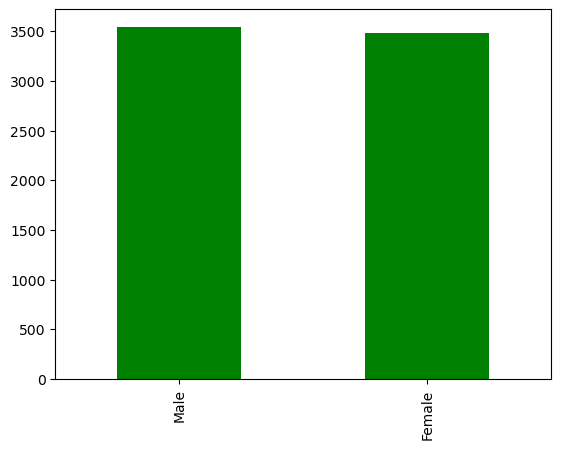

In [25]:
# Visualizing the gender column
print(df['gender'].value_counts())
df['gender'].value_counts().plot(kind ='bar',color = 'green')

Both the gender use the servies preety equally

No     3619
Yes    3402
Name: Partner, dtype: int64


<AxesSubplot:>

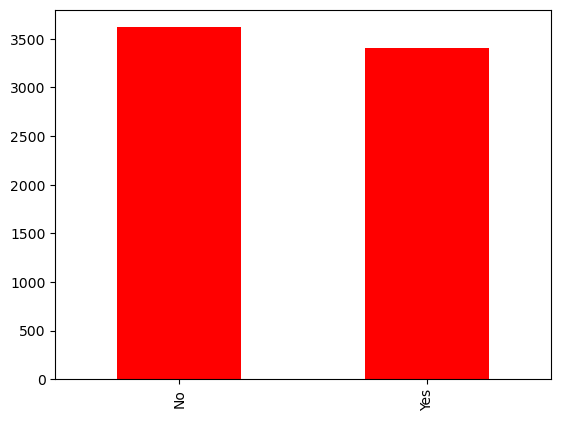

In [26]:
# Visualizing the partner column
print(df['Partner'].value_counts())
df['Partner'].value_counts().plot(kind ='bar',color = 'red')

Non partners are bit high in count of customers having partners.

No     4911
Yes    2110
Name: Dependents, dtype: int64


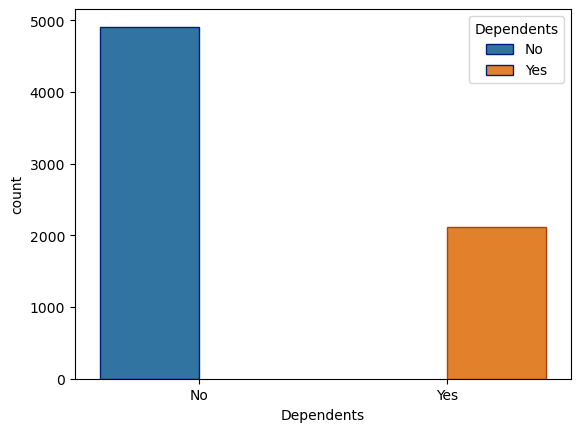

In [27]:
# visualization the dependents column
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,hue='Dependents',edgecolor=sns.color_palette("dark", 3))
plt.show()

By looking into the visualization we can that the dependents customers are less compared to non dependents.May the reason behind is the dependent customers didn't have money to spend on the service.

Yes    6339
No      682
Name: PhoneService, dtype: int64


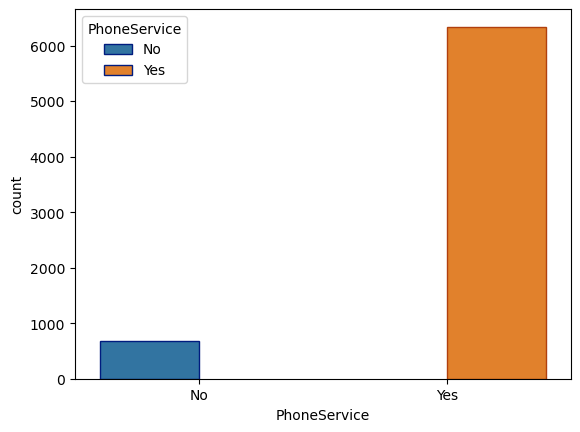

In [28]:
# visualization the PhoneService column
print(df['PhoneService'].value_counts())
sns.countplot(x='PhoneService',data=df,hue='PhoneService',edgecolor=sns.color_palette("dark", 3))
plt.show()

The PhoneService used by customers are more then the customers who don't use phone services.

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


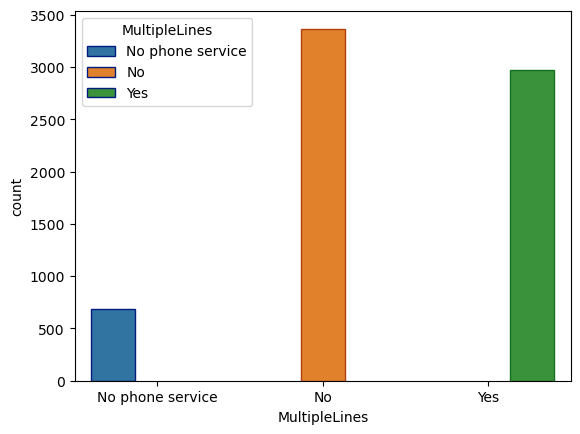

In [29]:
# visualization the Multiplelines column
print(df['MultipleLines'].value_counts())
sns.countplot(x='MultipleLines',data=df,hue='MultipleLines',edgecolor=sns.color_palette("dark", 3))
plt.show()

The customers having phoneservices from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


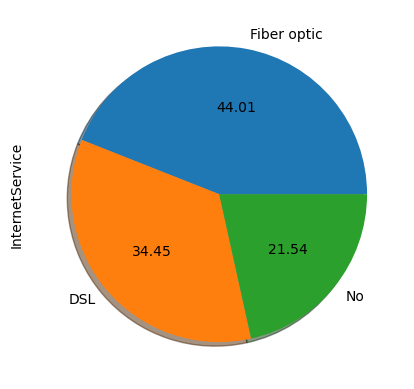

In [30]:
# visualization the internetservice column
df['InternetService'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['InternetService'].value_counts())

There are 43.96% people using internet service through fiber optic .
34.37 % people using internet through DSL(Digital Subscriber Line) .
And the rest doesn't use any internet services.


No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


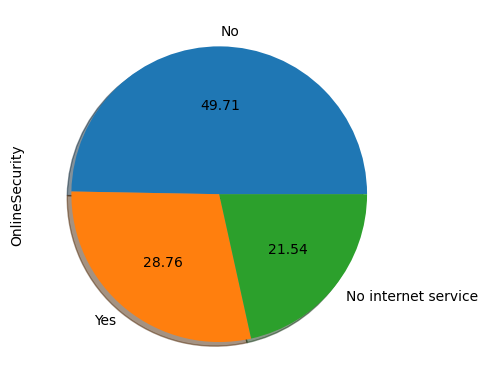

In [31]:
# visualization the online security column
df['OnlineSecurity'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['OnlineSecurity'].value_counts())

The observation suggests that online security is not a priority for a significant portion of the dataset (49.67%), while 28.67% of users have online security. Additionally, 21.67% of the dataset does not have internet service, which could be related to the lack of online security. 

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


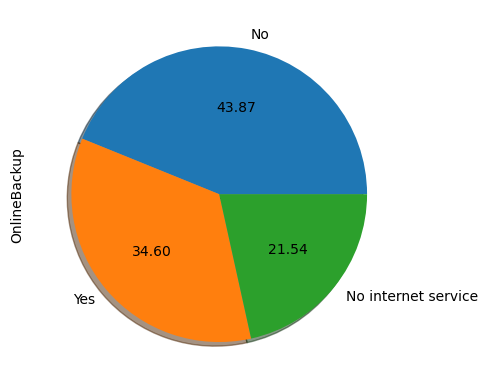

In [32]:
# visualization the  online backup column
df['OnlineBackup'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['OnlineBackup'].value_counts())

The observation suggests that 43.83% of users do not have online backup, while 34.49% have online backup. The presence of internet service is related to the availability of online backup, as 21.67% of the dataset does not have internet service.

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64
No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64
No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


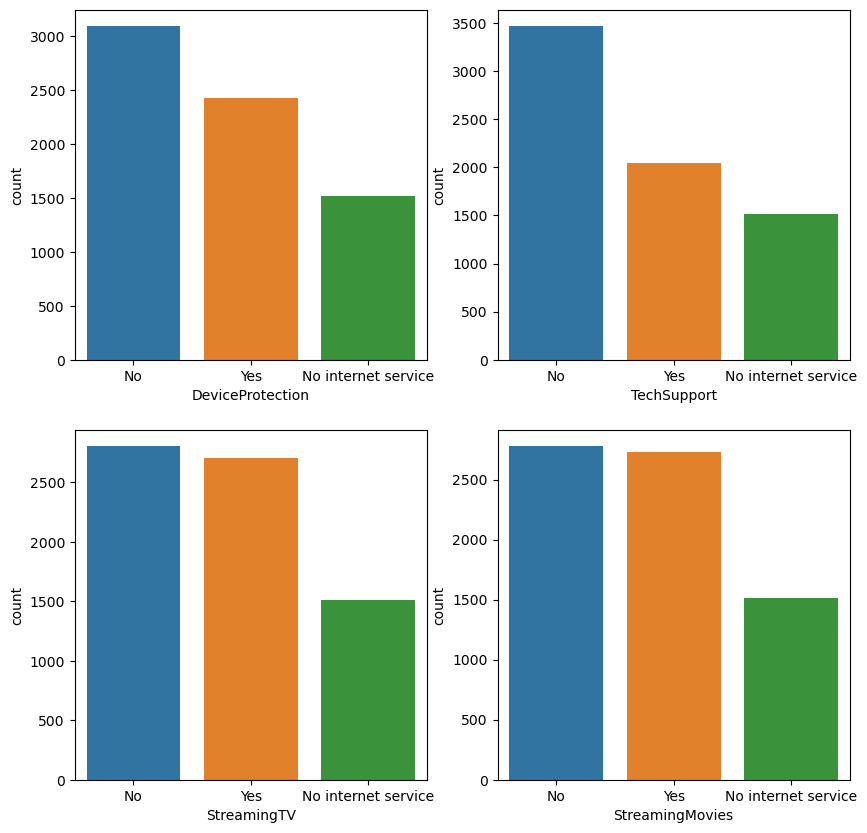

In [33]:
print(df['DeviceProtection'].value_counts())
print(df['TechSupport'].value_counts())
print(df['StreamingTV'].value_counts())
print(df['StreamingMovies'].value_counts())
# Set up a 2x2 grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Create a count plot for 'DeviceProtection' in the first subplot
sns.countplot(x='DeviceProtection', data=df, ax=axs[0, 0])

# Create a count plot for 'TechSupport' in the second subplot
sns.countplot(x='TechSupport', data=df, ax=axs[0, 1])

# Create a count plot for 'StreamingTV' in the third subplot
sns.countplot(x='StreamingTV', data=df, ax=axs[1, 0])

# Create a count plot for 'StreamingMovies' in the fourth subplot
sns.countplot(x='StreamingMovies', data=df, ax=axs[1, 1])

# Show the plots
plt.show()

## Observation:-
* DeviceProtection => The observation suggests that device protection is not present for a majority of the dataset (3095), while 2422 users have device protection. 1526 users do not have internet service, which could be related to the lack of device protection.

* TechSupport => The observation indicates that a majority of the dataset does not have tech support (2810), while 2707 users have tech support. Additionally, 1526 users do not have internet service, which could be related to the lack of tech support.

* StreamingTV=> The observation shows that the majority of the dataset does not have streaming TV (2785), while 2732 users have streaming TV. Furthermore, 1526 users do not have internet service, which could be related to the absence of streaming TV.

* reamingMovies=> The observation suggests that the majority of the dataset does not have streaming movies (2785), while 2732 users have streaming movies. Additionally, 1526 users do not have internet service, which could be related to the lack of streaming movies.

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


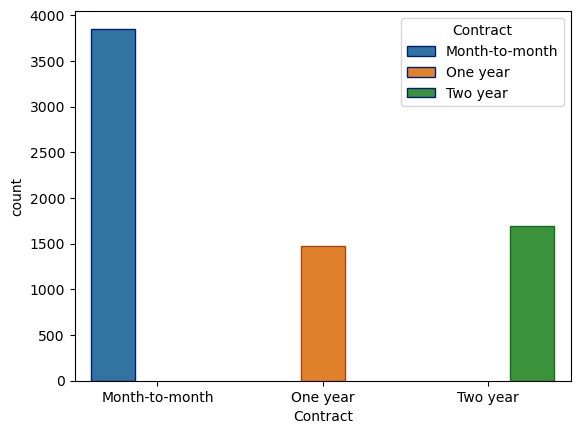

In [34]:
# visualization the contract column
print(df['Contract'].value_counts())
sns.countplot(x='Contract',data=df,hue='Contract',edgecolor=sns.color_palette("dark", 3))
plt.show()

Month to month customers  are more as compare to the customer with one year and two year contract.
And the customer with two year contract  are more then the customer with one  year contract may be the reason behind is the contract cost between one and two year is less.


Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


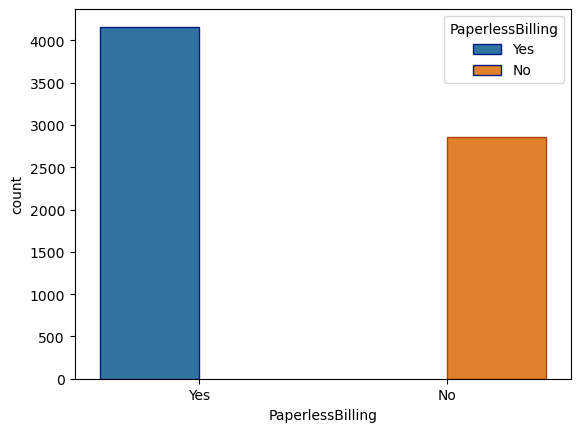

In [35]:
# visualization the paperlessbilling column
print(df['PaperlessBilling'].value_counts())
sns.countplot(x='PaperlessBilling',data=df,hue='PaperlessBilling',edgecolor=sns.color_palette("dark", 3))
plt.show()

More customer prefer paperlessbilling

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


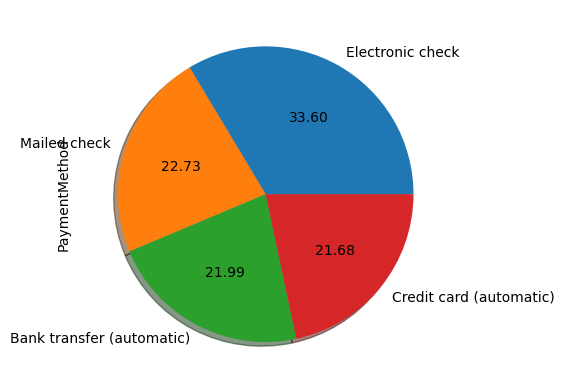

In [36]:
# visualization the PaymentMethod column
df['PaymentMethod'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['PaymentMethod'].value_counts())

The observation indicates that the majority of customers in the dataset used electronic check (33.58%) as their payment method, followed by mailed check (22.89%), bank transfer (automatic) (21.92%), and credit card (automatic) (21.61%).

No     5164
Yes    1857
Name: Churn, dtype: int64


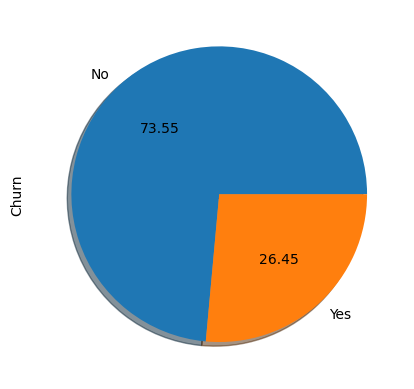

In [37]:
# Visualizing the number of churned customers

df['Churn'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['Churn'].value_counts())

We can observe that the count of "No churn" are high compared to the count of "Yes churn" i.e there are more number of customers who have not churned .This leads to class imbalance issue in the data. we will rectify it by using oversampling method in later part.

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


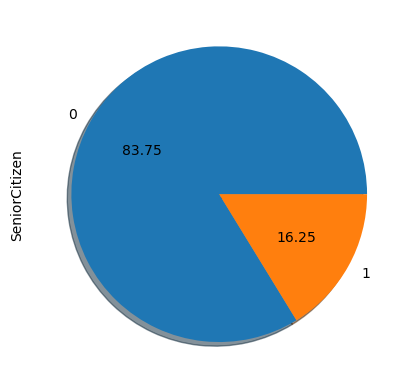

In [38]:
# Visualizing the senior citizen customers

df['SeniorCitizen'].value_counts().plot(kind ='pie',autopct = '%.2f',shadow = True)
print(df['SeniorCitizen'].value_counts())

Here Zero represents non senior citizens and 1 represents senior citizens. The count of 0 is way higher then 1 because the senior citizens rarely use phone.

## Univariate analysis on numerical columns

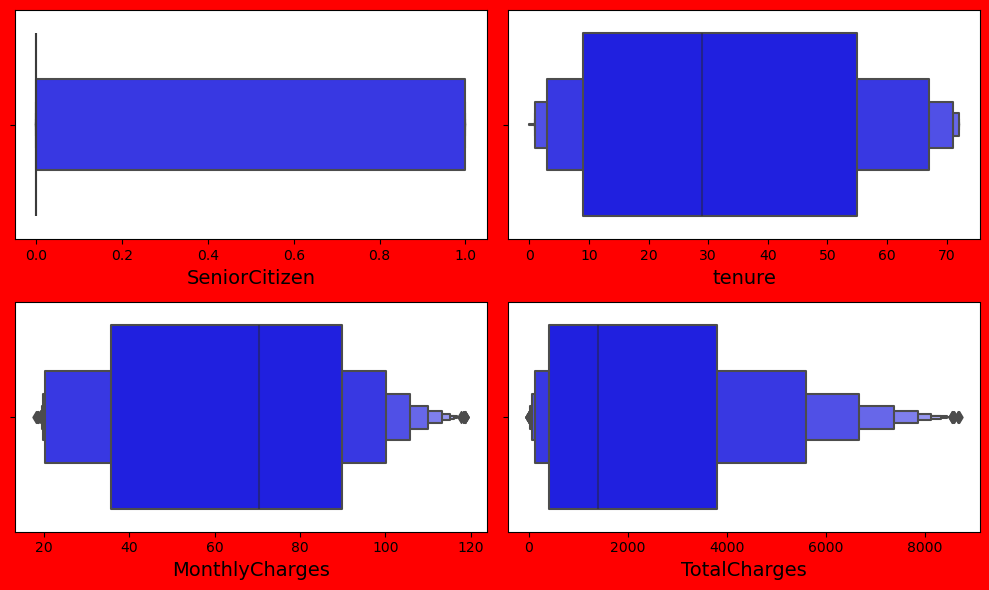

In [39]:
# checking data distribution on numerical columns
plt.figure(figsize=(10, 6), facecolor="red")
plotnumber = 1
for col in num_cols:
    if plotnumber <=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxenplot(df[col] ,color='b')
        plt.xlabel(col, fontsize=14)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Observation -:
* skip the senior citizen  coloumns because it is an categorical.And categorical data is data that represents categories or groups, and it cannot be treated as continuous numerical data. Therefore, it does not make sense to calculate any  measure of central tendency  on categorical data.
* if you are thinking that why i considering tenure as a categorical .The reason behind is it has multiple category inside it so its looks like a numerical column but its a categorical column with multiple category.
* In other three columns we can see the data is little skewed towards right.


## Bivariate analysis and multi variate analysis

<AxesSubplot:xlabel='gender', ylabel='SeniorCitizen'>

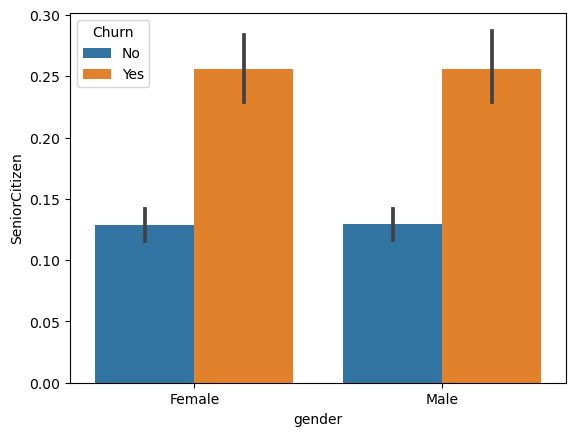

In [40]:
# comparing gender and seniorcitizen on churn rate
sns.barplot(x =df['gender'],y=df['SeniorCitizen'],data =df,hue='Churn')

There is no significant difference between the columns. The customers churns remains unaffected in gender and seniorcitizen case.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

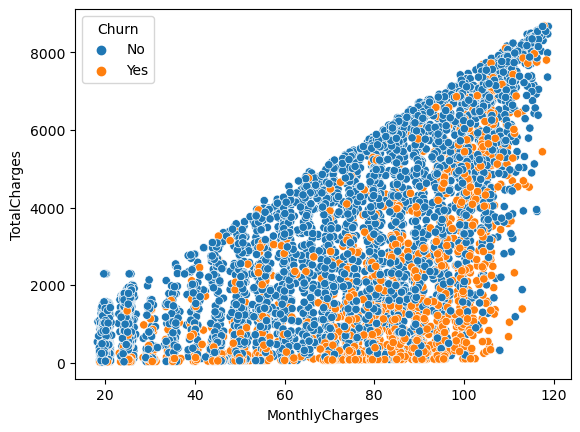

In [41]:
# comparing monthlycharges and totalcharges on streamingTV and StreamingMovies
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'],hue='Churn',data=df)



when monthly charges are high and total charges are low the in that case churn rate is low

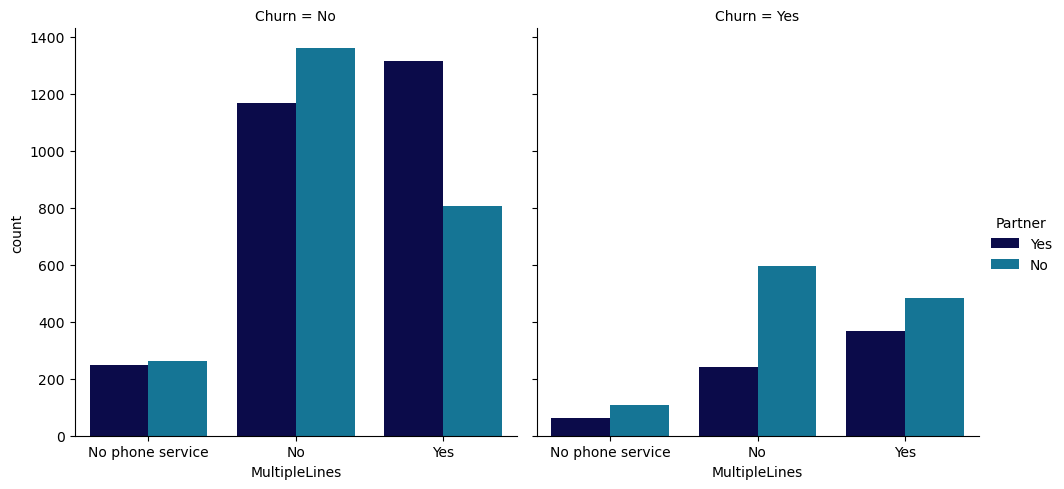

In [42]:
#checking churn level and mulitplelines
sns.catplot(x ='MultipleLines',col='Churn',palette = 'ocean',kind='count',data =df,legend=True,hue='Partner')

Non partners have high probability in all three categories no phone service , no multiple lines and yes as compare to partners.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

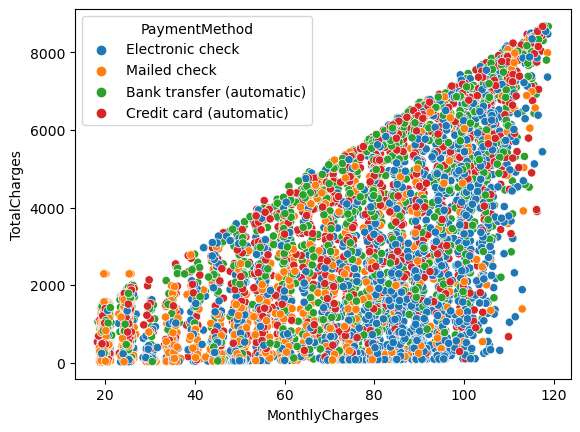

In [43]:
sns.scatterplot(df['MonthlyCharges'],df['TotalCharges'],hue='PaymentMethod',data=df)

customer used banktranfer and creditcard when charges are high .

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


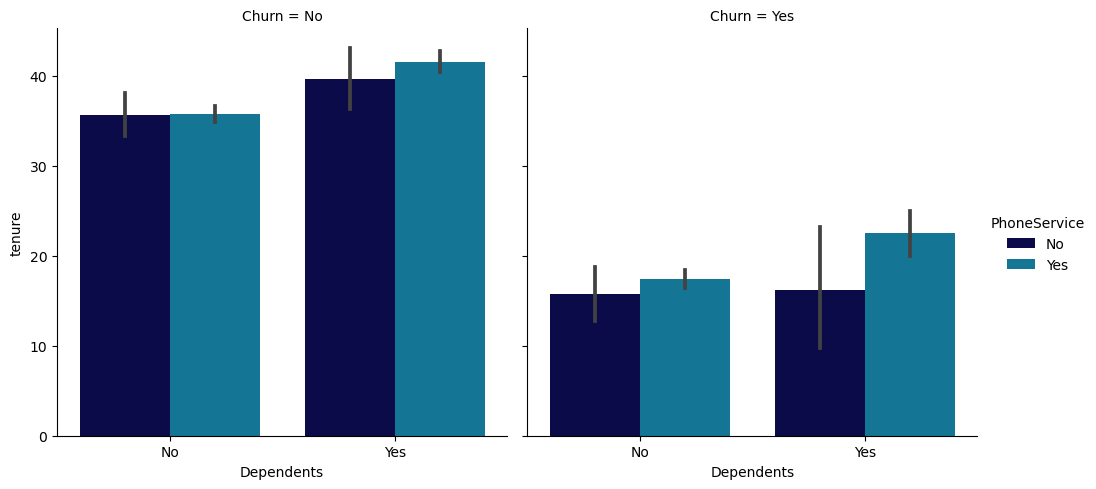

In [45]:
#checking churn level and dependents
sns.catplot(x ='Dependents',y='tenure',col='Churn',palette = 'ocean',kind='bar',data =df,legend=True,hue='PhoneService')

Dependent have high churn rate as compare to independents 

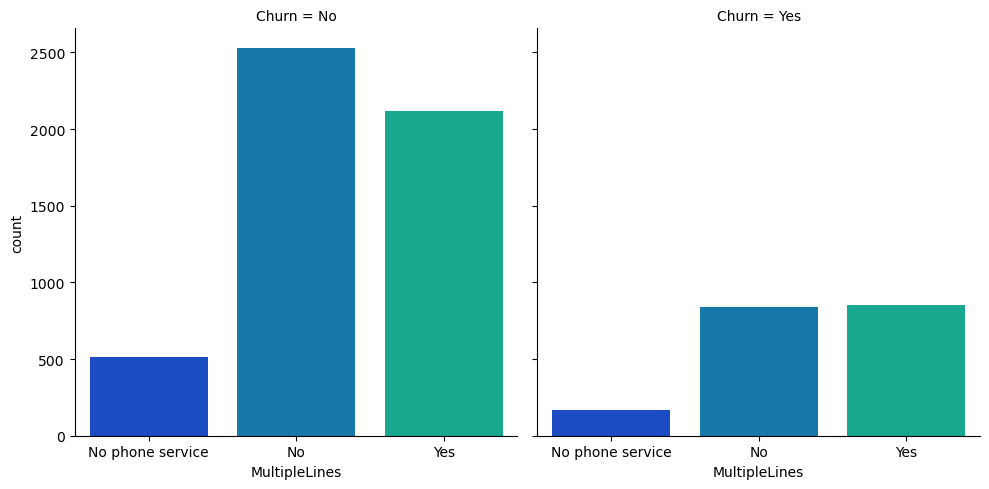

In [46]:
sns.catplot(x ='MultipleLines',col='Churn',palette='winter',data = df,kind='count')
plt.show()

Customers with Multiplelines have low churn as compare to no multiplelines

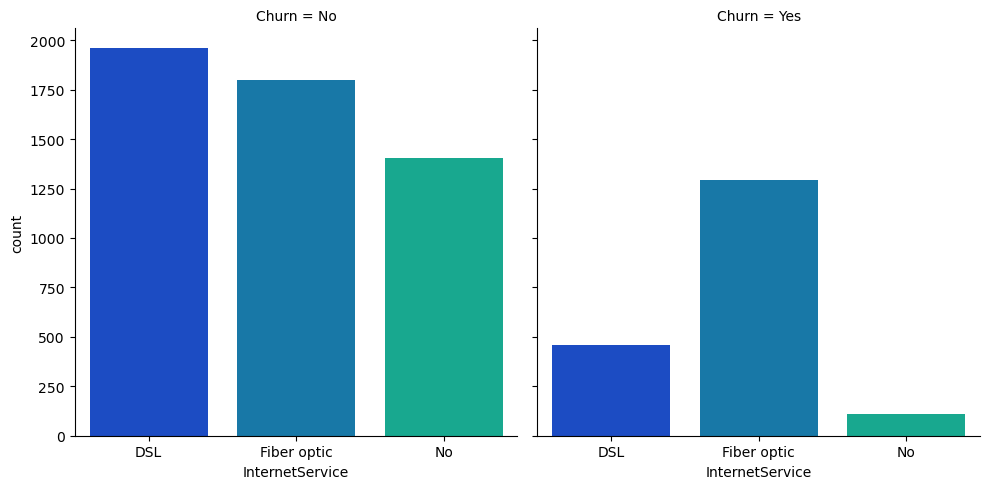

In [47]:
sns.catplot(x ='InternetService',col='Churn',palette='winter',data = df,kind='count')
plt.show()

fiber optic have high churn rate as compare to others


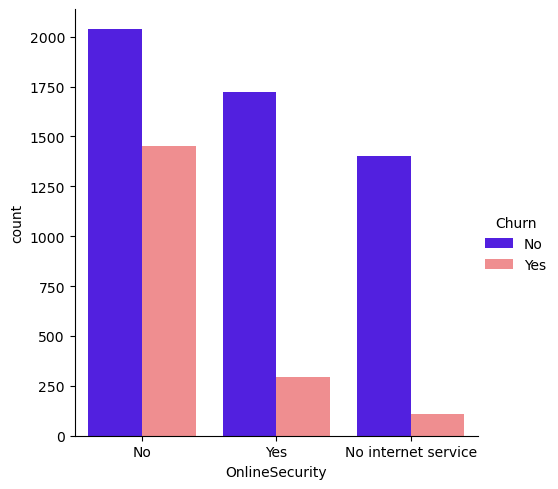

In [48]:
sns.catplot(x ='OnlineSecurity',hue='Churn',palette='gnuplot2',data = df,kind='count')


the customers with onlinesecurity and customers with no internet service have low churn rate.

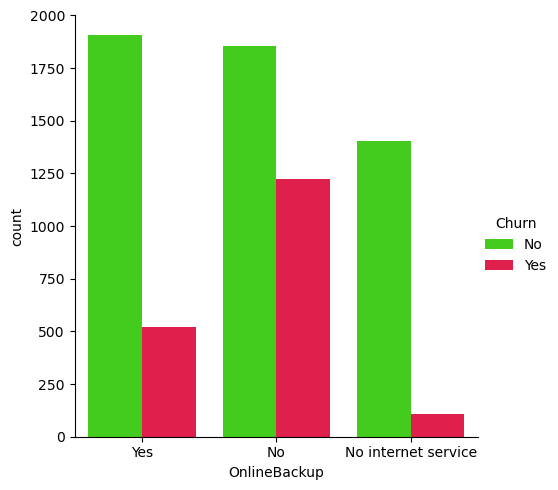

In [49]:
sns.catplot(x ='OnlineBackup',hue='Churn',palette='prism',data = df,kind='count')

the customers with no online backup have high churn rate

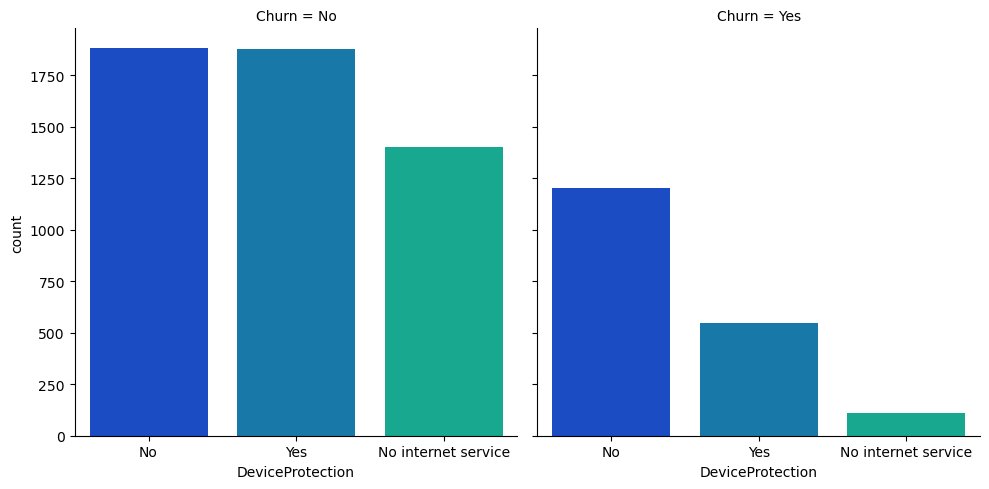

In [50]:
sns.catplot(x ='DeviceProtection',col='Churn',palette='winter',data = df,kind='count')

The customers who do not own any device protection have very high churn rate compared to others

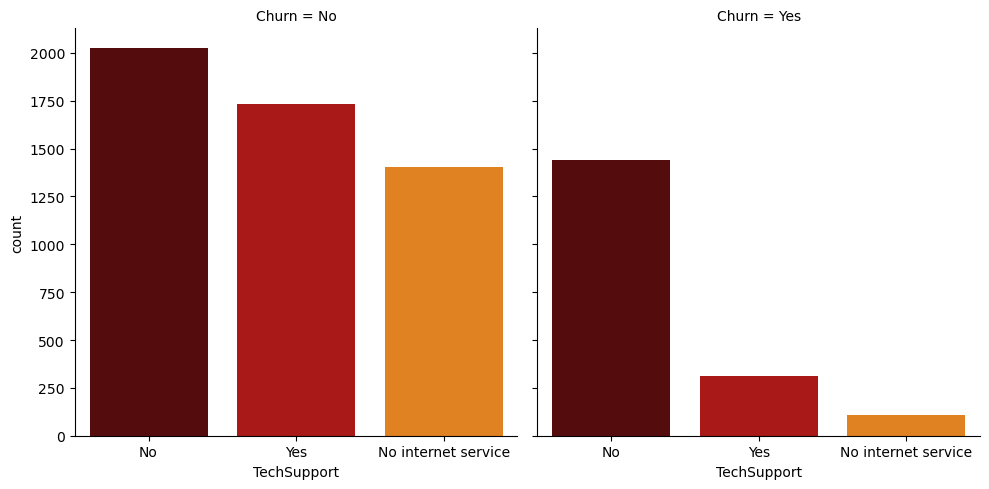

In [51]:
sns.catplot(x ='TechSupport',col='Churn',palette='gist_heat',data = df,kind='count')

customer who got tech support have low churn rate as compare to no tech support

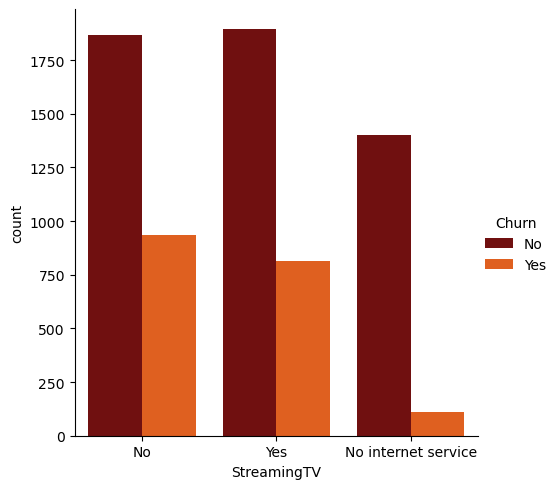

In [52]:
sns.catplot(x ='StreamingTV',hue='Churn',palette='gist_heat',data = df,kind='count')

The churn rate is nearly same if the customer own streaming TV or not

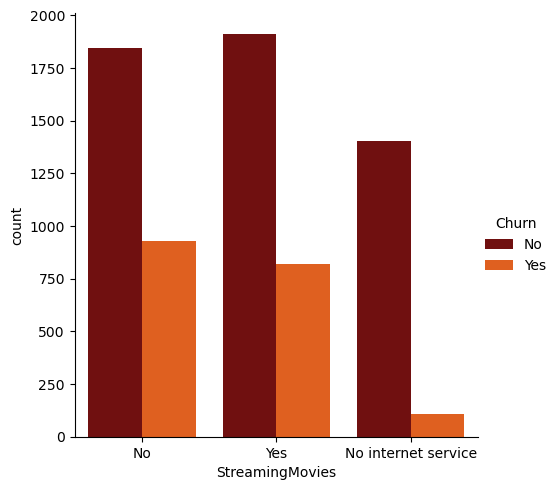

In [53]:
sns.catplot(x ='StreamingMovies',hue='Churn',palette='gist_heat',data = df,kind='count')

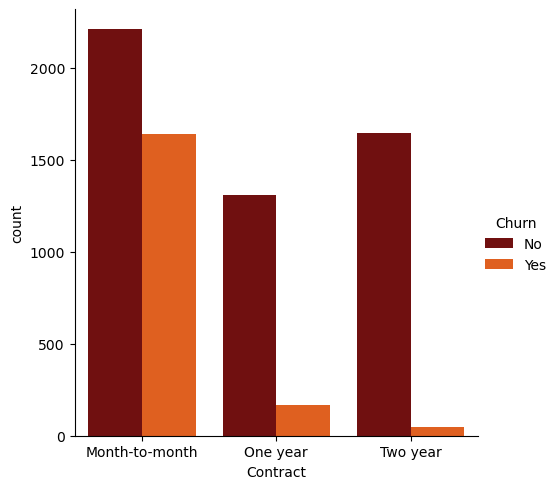

In [54]:
sns.catplot(x ='Contract',hue='Churn',palette='gist_heat',data = df,kind='count')

Month to month have high value in both churn and no churn.

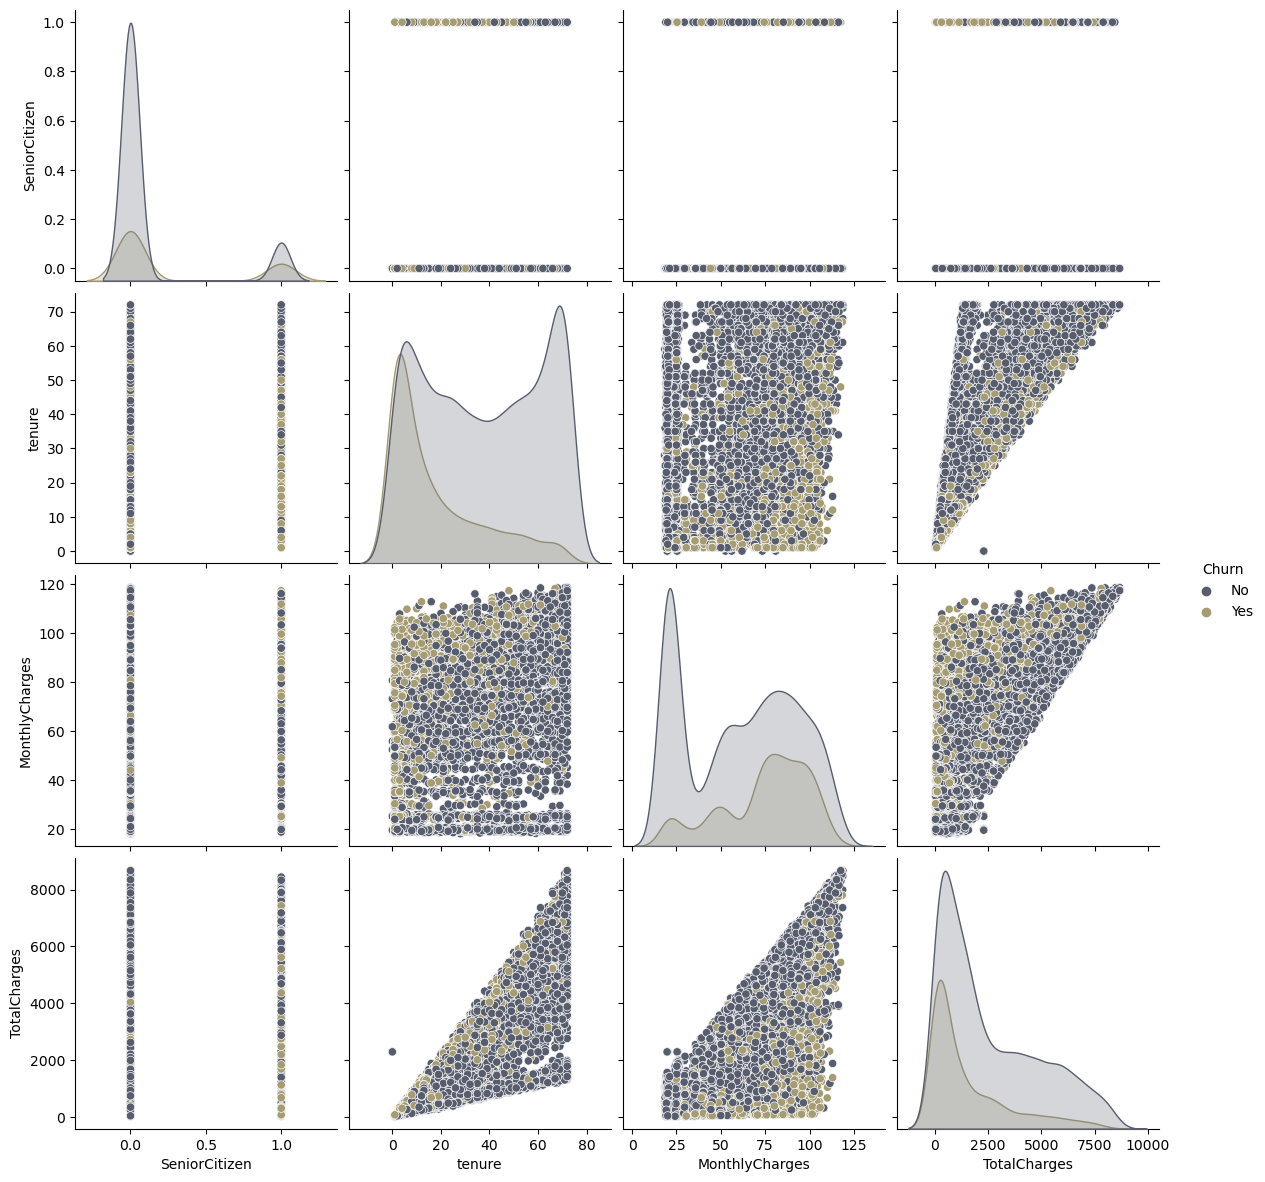

In [55]:
sns.pairplot(df,hue='Churn',size=3,palette='cividis')
plt.show()

In [56]:
# checking for skewness
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959073
dtype: float64

The skewness is quiet expectable first two columns are categorical so we will fix only total charges 

In [57]:
# removing the skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])
#

In [58]:
# checking skewness again
df.skew()

SeniorCitizen     1.829987
tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.010527
dtype: float64

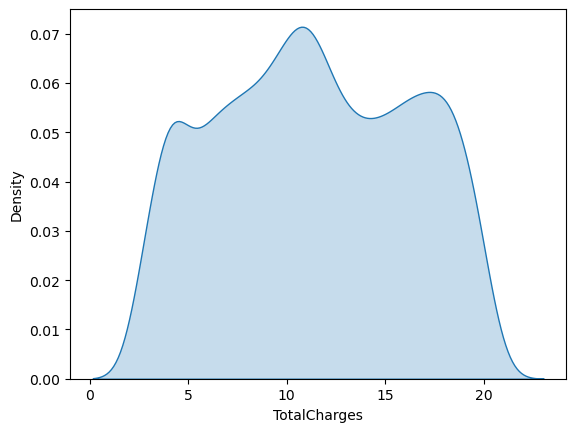

In [59]:
# checking the distribution
sns.distplot(df['TotalCharges'],kde_kws={'shade':True},hist=False)
plt.show()

now skewness issue is fixed in the total charges

# Encoding the categorical data

In [60]:
from sklearn.preprocessing import LabelEncoder

od = LabelEncoder()
for i in cat_cols:
    if df[i].dtypes=='object':
        df[i] = od.fit_transform(df[i].values.reshape(-1,1),)
df     
        


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.102045,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,12.362766,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.764407,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,12.255516,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.332704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,12.579230,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,19.454331,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,7.023391,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,6.743066,1


In [61]:
from scipy.stats import zscore
x = df[['tenure','MonthlyCharges','TotalCharges']]
z =np.abs(zscore(x))
z.shape

(7021, 3)

In [62]:
threshold =3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [63]:
# by using IQR

tpercentile25 = df['tenure'].quantile(0.25)
mpercentile25 = df['MonthlyCharges'].quantile(0.25)
topercentile25 = df['TotalCharges'].quantile(0.25)

tpercentile75 = df['tenure'].quantile(0.75)
mpercentile75 = df['MonthlyCharges'].quantile(0.75)
topercentile75 = df['TotalCharges'].quantile(0.75)



In [64]:
tiqr = tpercentile75 - tpercentile25
miqr = mpercentile75 - mpercentile25
toiqr = topercentile75 - topercentile25

In [65]:
upper_limit1 = tpercentile75 + 1.5 * tiqr
upper_limit2 = mpercentile75 + 1.5 * miqr
upper_limit3 = topercentile75 + 1.5 * toiqr


In [66]:
lower_limit1 =tpercentile25 - 1.5 * tiqr
lower_limit2 =mpercentile25 - 1.5 * miqr
lower_limit3 =topercentile25 - 1.5 * toiqr 

In [67]:
upper_limit1
lower_limit1

-60.0

In [68]:
df[df['tenure']>upper_limit1]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [69]:
df[df['MonthlyCharges']>upper_limit2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [70]:
df[df['TotalCharges']>upper_limit3]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


By using zscore and iqr we can say that there is no outliers

<AxesSubplot:>

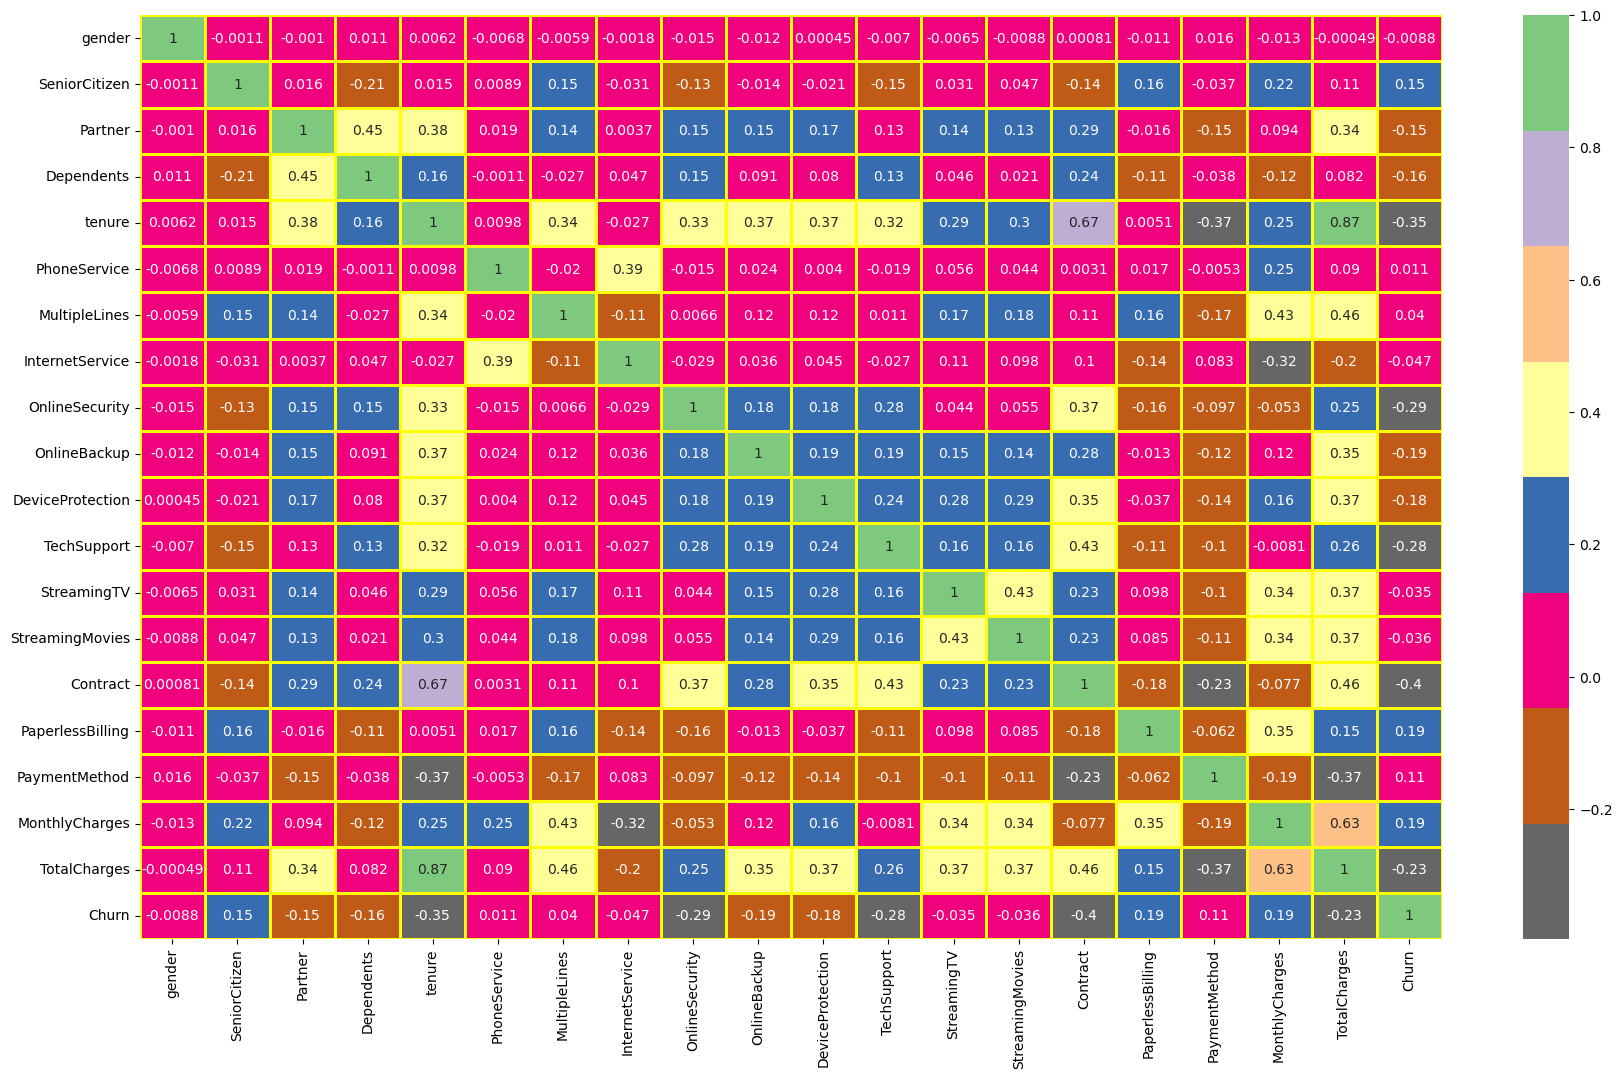

In [71]:
fig, ax = plt.subplots(figsize=(21,12))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=2, ax=ax,linecolor='yellow',cmap='Accent_r')

This heatmap shows the correlation matrix by visulaizing the data. We can observe the relation between feature to feature to label.This heatmap contains both positive and negative correlation
* There is no much positive correlation between the target and features
* The columns MonthlyCharges , PaperlessBilling ,PaymentMethod, SeniorCitizen have positive correlation with label .
* Contract , tenure, Onlinesecurity, Teachsupport ,TotalCharges , DeviceProtection, OnlineBackup , partner and Dependents have negative correlation with target.
* Tenure and totalcharges are highly correlated with eachother so we can drop them if necessary.


<AxesSubplot:>

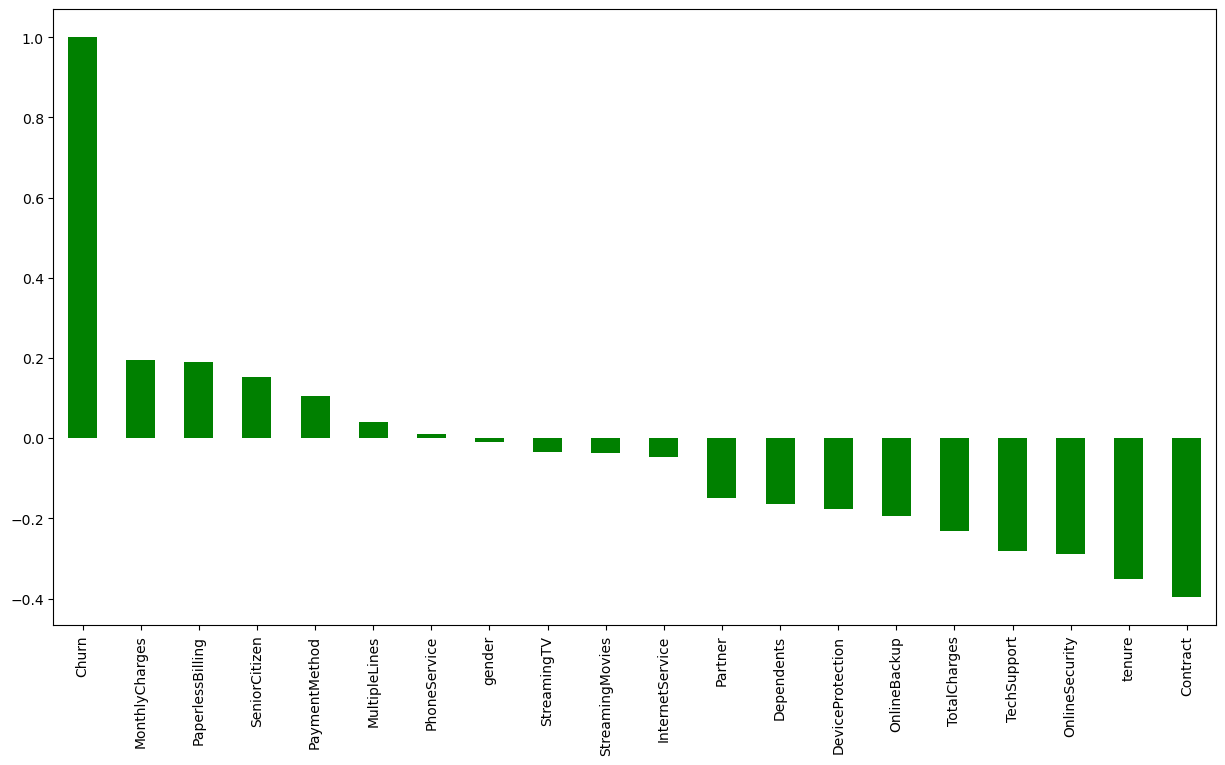

In [72]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color ='g')

we can see in visualization the less features are positively correlated with target

In [73]:
# seprating feature and target variable

x = df.drop('Churn',axis=1)
y = df['Churn']

In [74]:
# scaling the data

from sklearn.preprocessing import StandardScaler

sl = StandardScaler()
x = pd.DataFrame(sl.fit_transform(x),columns=x.columns)

In [75]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,0.059614,-1.181531,-0.918456,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,-1.164135,-1.696410
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.994674,-1.181531,1.405320,-1.029902,1.242972,-0.924901,-1.113775,-1.121714,0.368496,-1.206190,1.338965,-0.262811,0.200545
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,-1.181531,1.405320,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,1.338965,-0.365914,-1.355894
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,0.059614,-1.181531,1.405320,-1.029902,1.242972,1.394288,-1.113775,-1.121714,0.368496,-1.206190,-1.471460,-0.750058,0.178576
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,0.175278,-0.918456,-1.029902,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,0.194503,-1.239485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0.991349,-0.440508,1.031400,1.525611,-0.345224,0.328006,1.113903,-1.181531,1.405320,-1.029902,1.242972,1.394288,1.144329,1.136185,0.368496,0.829057,1.338965,0.663458,0.244885
7017,-1.008726,-0.440508,1.031400,1.525611,1.611307,0.328006,1.113903,0.175278,-0.918456,1.240410,1.242972,-0.924901,1.144329,1.136185,0.368496,0.829057,-0.534652,1.275428,1.653172
7018,-1.008726,-0.440508,1.031400,1.525611,-0.875118,-3.048725,0.059614,-1.181531,1.405320,-1.029902,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,-1.172450,-0.893167
7019,0.991349,2.270104,1.031400,-0.655475,-1.160445,0.328006,1.113903,0.175278,-0.918456,-1.029902,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,1.338965,0.317562,-0.950588


 scaling is necessary because many algorithms are sensitive to the relative scales of the input features, which can lead to  model to performance biased.

In [76]:
# again checking vif  value to confirm whether the multicollinearity still exists or not

from statsmodels.stats.outliers_influence import variance_inflation_factor
vf =  pd.DataFrame()
vf['VIF Values'] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vf['Features'] = x.columns
vf


,VIF Values,Features
0,1.001707,gender
1,1.149506,SeniorCitizen
2,1.458941,Partner
3,1.383011,Dependents
4,12.323621,tenure
5,1.622991,PhoneService
6,1.395000,MultipleLines
7,1.863894,InternetService
8,1.256004,OnlineSecurity
9,1.192208,OnlineBackup


The features causing the multicollinearity issue can be found by looking at VIF values. The feature is located here. Totalcharge and tenure both have VIF values more than 10, which indicates a strong association between them and other parameters. First, we will try to remove one of the columns; if the problem persists, we will then try to remove the column with the highest VIF.

In [77]:
# dropping total charges 
x.drop('TotalCharges',axis =1,inplace=True)

In [78]:
# again checking vif  value to confirm whether the multicollinearity still exists or not

from statsmodels.stats.outliers_influence import variance_inflation_factor
vf =  pd.DataFrame()
vf['VIF Values'] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vf['Features'] = x.columns
vf


,VIF Values,Features
0,1.001693,gender
1,1.149452,SeniorCitizen
2,1.456924,Partner
3,1.381272,Dependents
4,2.741493,tenure
5,1.622879,PhoneService
6,1.388627,MultipleLines
7,1.820631,InternetService
8,1.247486,OnlineSecurity
9,1.185501,OnlineBackup


The multicollinearity issue has now been resolved.

The data is now balanced. We can now create a machine learning model.


## Model Building

In [79]:
# import dependencies
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score ,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier

## Train test split

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Logistic Regression 

In [81]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)
from sklearn import metrics
prediction_test = model.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7893238434163701


In [82]:
print(classification_report(y_test, prediction_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1020
           1       0.65      0.51      0.57       385

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.72      1405
weighted avg       0.78      0.79      0.78      1405



## Decision Tree Classifier

In [83]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [84]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [85]:
model_dt.score(x_test,y_test)

0.7701067615658364

In [86]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1020
           1       0.60      0.48      0.53       385

    accuracy                           0.77      1405
   macro avg       0.71      0.68      0.69      1405
weighted avg       0.76      0.77      0.76      1405



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [87]:
# Create an instance of SMOTEENN resampler
sm = SMOTEENN()

# Use SMOTEENN to resample the original dataset
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [88]:
# Split the resampled data into training and testing sets
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled1, y_resampled1,test_size=0.3,random_state=43)

In [89]:
# Create a decision tree classifier with specified hyperparameters
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

# Fit the decision tree classifier on the SMOTEENN resampled training data
model_dt_smote.fit(xr_train, yr_train)

# Use the trained decision tree classifier to predict the labels of the test data
yr_predict = model_dt_smote.predict(xr_test)

# Calculate and print the accuracy score of the model on the test data
model_score_r = model_dt_smote.score(xr_test, yr_test)
print("Accuracy score:", model_score_r)

# Generate and print a classification report for the model on the test data
report = metrics.classification_report(yr_test, yr_predict)
print("Classification report:\n", report)

Accuracy score: 0.9028296849973305
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       824
           1       0.92      0.91      0.91      1049

    accuracy                           0.90      1873
   macro avg       0.90      0.90      0.90      1873
weighted avg       0.90      0.90      0.90      1873



In [90]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[738  86]
 [ 96 953]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

## Random Forest Classifier

In [91]:
# Create an instance of SMOTEENN resampler
sm = SMOTEENN()

# Use SMOTEENN to resample the original dataset
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

# Split the resampled data into training and testing sets
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, 
                                                            y_resampled1, test_size=0.3, random_state=20)

# Create a random forest classifier with specified hyperparameters
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                        random_state=100, max_depth=6, min_samples_leaf=8)

# Fit the random forest classifier 
model_rf_smote.fit(xr_train1, yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [92]:
#  predict the labels of the test data
yr_predict1 = model_rf_smote.predict(xr_test1)

# Calculate and print the accuracy score 
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print("Model accuracy score:", model_score_r1)

# Generate  classification report
report = metrics.classification_report(yr_test1, yr_predict1)
print("Classification report:\n", report)

Model accuracy score: 0.9275675675675675
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       873
           1       0.92      0.95      0.93       977

    accuracy                           0.93      1850
   macro avg       0.93      0.93      0.93      1850
weighted avg       0.93      0.93      0.93      1850



In [93]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[791  82]
 [ 52 925]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

## Support Vector Machine

In [94]:
from sklearn.svm import SVC


model_svm = SVC(kernel='linear')

# Fit the support vector machine classifier on the training data
model_svm.fit(X_resampled1,y_resampled1)

# predict the label of test data
preds = model_svm.predict(xr_test1)

# Calculate  accuracy score 
accuracy = metrics.accuracy_score(yr_test1, preds)
print("Model accuracy score:", accuracy)

# Generate  confusion matrix 
cm = confusion_matrix(yr_test1, preds)
print("Confusion matrix:\n", cm)

# print a classification report for the model on the test data
report = classification_report(yr_test1, preds)
print("Classification report:\n", report)

Model accuracy score: 0.9064864864864864
Confusion matrix:
 [[777  96]
 [ 77 900]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       873
           1       0.90      0.92      0.91       977

    accuracy                           0.91      1850
   macro avg       0.91      0.91      0.91      1850
weighted avg       0.91      0.91      0.91      1850



Support Vector Machine also giving good accuracy 

## Ada Boost

In [95]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

model.fit(X_resampled1,y_resampled1)
preds = model.predict(xr_test1)
print('Model Accuracy is =',metrics.accuracy_score(yr_test1, preds))

# Generate and print a confusion matrix for the model on the test data
cm = confusion_matrix(yr_test1, preds)
print("Confusion matrix:\n", cm)

# Generate and print a classification report for the model on the test data
report = classification_report(yr_test1, preds)
print("Classification report:\n", report)

Model Accuracy is = 0.932972972972973
Confusion matrix:
 [[802  71]
 [ 53 924]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       873
           1       0.93      0.95      0.94       977

    accuracy                           0.93      1850
   macro avg       0.93      0.93      0.93      1850
weighted avg       0.93      0.93      0.93      1850



* In comparison to all the machine learning algorithms I've used, Ada boost had the highest accuracy.

## cross validation score

In [96]:
# Suppport vector machine

from sklearn.model_selection import cross_val_score

score = cross_val_score(model_svm,X_resampled1,y_resampled1)
print(score)
print(score.mean())
print('difference between accuracy score and cross validation score is',metrics.accuracy_score(yr_test1,yr_predict1 )-score.mean())

[0.91808597 0.91403082 0.90916464 0.90754258 0.90024331]
0.9098134630981345
difference between accuracy score and cross validation score is 0.01775410446943304


In [97]:
# Ada boost
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,X_resampled1,y_resampled1)
print(score)
print(score.mean())
print('difference between accuracy score and cross validation score is',metrics.accuracy_score(yr_test1, preds)-score.mean())

[0.918897   0.92295215 0.94079481 0.94647202 0.92781833]
0.9313868613138686
difference between accuracy score and cross validation score is 0.0015861116591043833


In [98]:
#Decision Tree classifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(model_dt_smote,X_resampled1,y_resampled1)
print(score)
print(score.mean())
print('difference between accuracy score and cross validation score is',metrics.accuracy_score(yr_test1, preds)-score.mean())

[0.91159773 0.92376318 0.92051906 0.92781833 0.92538524]
0.921816707218167
difference between accuracy score and cross validation score is 0.011156265754805994


In [99]:
# Random Forest classifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(model_rf_smote,X_resampled1,y_resampled1)
print(score)
print(score.mean())
print('difference between accuracy score and cross validation score is',metrics.accuracy_score(yr_test1, preds)-score.mean())

[0.92376318 0.918897   0.93187348 0.93673966 0.92538524]
0.927331711273317
difference between accuracy score and cross validation score is 0.005641261699655953


* Decision Tree classifier have most accurate CV so we will use that for hyperparameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
## Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_resampled1, y_resampled1)


# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


# Train the decision tree with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params)
dt_classifier_best.fit(X_resampled1, y_resampled1)


# Evaluate the model on the test set
accuracy = dt_classifier_best.score(xr_test1, yr_predict1)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9347931873479318
Accuracy on test set: 0.927027027027027


In [101]:
# final model using Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=1,min_samples_split=2)
final_model = dt_classifier.fit(X_resampled1,y_resampled1)
pred = final_model.predict(xr_test1)
accuracy = accuracy_score(yr_test1,pred)
print('The final accuracy is = ',accuracy*100)

# max_depth =15 is overfitting the model i change it to 8


The final accuracy is =  96.1081081081081


In [102]:
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_curve

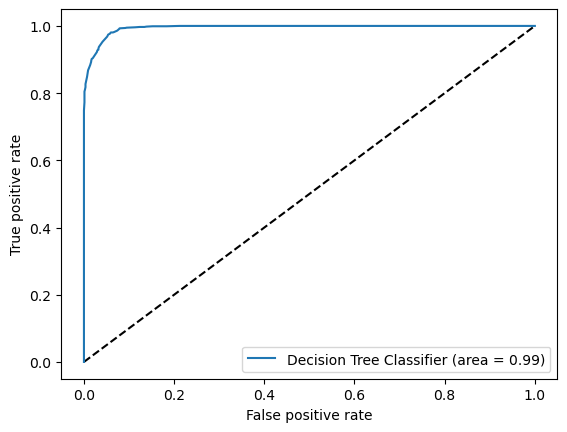

AUC Score is: 0.960287060583571


In [103]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

pred_prob = final_model.predict_proba(xr_test1)[:, 1]
fpr, tpr, thresholds = roc_curve(yr_test1, pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

auc_score = roc_auc_score(yr_test1, final_model.predict(xr_test1))
print('AUC Score is:', auc_score)

In [104]:
# saving the model using .pkl
import joblib
joblib.dump(final_model,'Telecom_customer_churn.pkl')


['Telecom_customer_churn.pkl']

In [105]:
# predicting the saved model
model1 = joblib.load("Telecom_customer_churn.pkl")
#prediction
prd = model1.predict(xr_test)
prd

array([1, 1, 0, ..., 1, 0, 1])

Here are the predicted values of the churn customers

In [106]:
A = np.array(yr_test)
df = pd.DataFrame()
df['Predicted'] = prd
df['Original']=A
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1868,0,0
1869,1,1
1870,1,1
1871,0,0
